# Goal
The purpose of this repository is to explore model asthma & COPD hospitalizations from the smoke estimate, premature death rate, and prevalence of each disease.

# 0. Set-up

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
health_data = pd.read_csv("./intermediate/combined_health_data.csv")

In [13]:
health_data.head()

,Year,Deaths: Asthma (OR),Deaths: Chronic obstructive pulmonary disease (OR),Deaths: Chronic respiratory diseases (OR),Incidence: Asthma (OR),Incidence: Chronic obstructive pulmonary disease (OR),Incidence: Chronic respiratory diseases (OR),Prevalence: Asthma (OR),Prevalence: Chronic obstructive pulmonary disease (OR),Prevalence: Chronic respiratory diseases (OR),...,Asthma: Crude HR Ages 15-34 (DC),Asthma: Crude HR Ages 35-64 (DC),Asthma: Crude HR Ages 65+ (DC),Asthma: Total Hospitalizations (DC),COPD: Age-Adjusted HR (DC),COPD: Crude HR (DC),COPD: Crude HR Ages 25-44 (DC),COPD: Crude HR Ages 45-64 (DC),COPD: Crude HR Ages 65-84 (DC),PDR Age-Adjusted (DC)
0,1990,0.260799,4.352008,5.066918,127.119372,29.431595,222.738686,982.016766,475.081323,1329.252444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,0.258153,4.406063,5.126562,117.750089,29.793294,208.502360,899.341041,481.446187,1264.845025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992,0.261474,4.547597,5.286948,109.420378,30.183304,195.875842,825.951328,487.333620,1207.356910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,0.268718,4.840284,5.610785,102.433649,30.550106,185.435955,765.234478,492.150495,1160.079064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,0.270207,4.907768,5.690183,97.124498,30.839320,177.791042,720.584432,495.242339,1125.107384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
health_data.columns

Index(['Year', 'Deaths: Asthma (OR)',
       'Deaths: Chronic obstructive pulmonary disease (OR)',
       'Deaths: Chronic respiratory diseases (OR)', 'Incidence: Asthma (OR)',
       'Incidence: Chronic obstructive pulmonary disease (OR)',
       'Incidence: Chronic respiratory diseases (OR)',
       'Prevalence: Asthma (OR)',
       'Prevalence: Chronic obstructive pulmonary disease (OR)',
       'Prevalence: Chronic respiratory diseases (OR)',
       'Asthma: Age-Adjusted HR (DC)', 'Asthma: Crude HR (DC)',
       'Asthma: Crude HR Ages 0-4 (DC)', 'Asthma: Crude HR Ages 5-14 (DC)',
       'Asthma: Crude HR Ages 15-34 (DC)', 'Asthma: Crude HR Ages 35-64 (DC)',
       'Asthma: Crude HR Ages 65+ (DC)', 'Asthma: Total Hospitalizations (DC)',
       'COPD: Age-Adjusted HR (DC)', 'COPD: Crude HR (DC)',
       'COPD: Crude HR Ages 25-44 (DC)', 'COPD: Crude HR Ages 45-64 (DC)',
       'COPD: Crude HR Ages 65-84 (DC)', 'PDR Age-Adjusted (DC)'],
      dtype='object')

In [15]:
smoke_estimates = pd.read_csv('./output/redmond_smoke_estimates.csv', index_col=0)

In [27]:
smoke_estimates.head()
smoke_estimates = smoke_estimates.rename(columns= {"daily_avg_fire_szn": "Annual Smoke Index"}).drop(columns = 'annual_smoke_intake')

<AxesSubplot:ylabel='Frequency'>

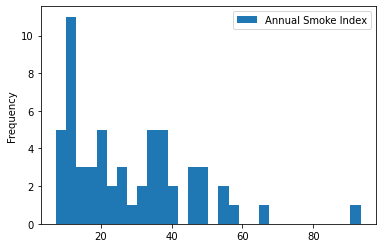

In [28]:
smoke_estimates[['Fire_Year', 'Annual Smoke Index']].set_index('Fire_Year').plot(kind='hist', bins=30)

## Check Correlation

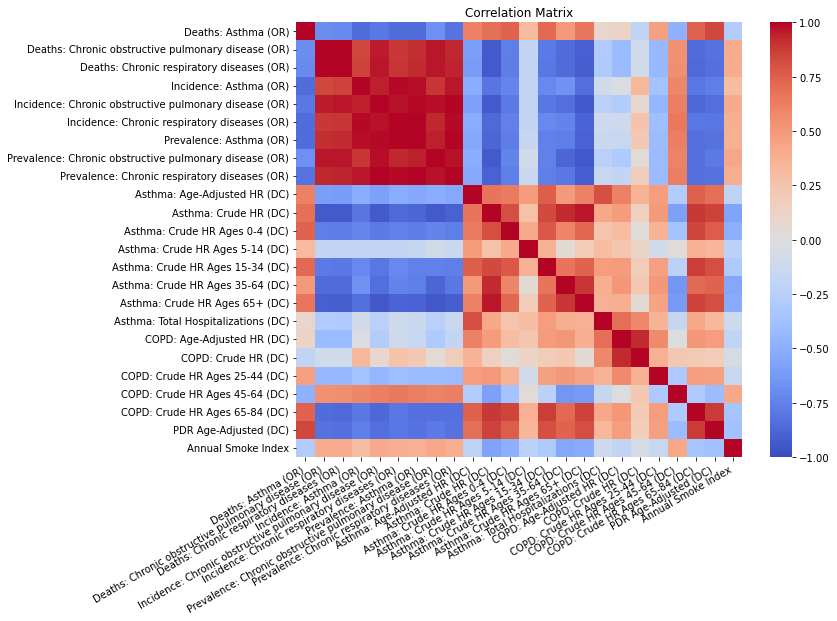

In [29]:
# Merge dataframes on the common column 'Year'
merged_df = pd.merge(health_data, smoke_estimates, left_on='Year', right_on='Fire_Year', how='inner').drop(columns=['Fire_Year'])

# Analyze correlation between smoke intake and hospitalization rates/incidence
correlation_matrix = merged_df.drop(columns=['Year']).dropna().corr()
#[['annual_smoke_intake', 'Asthma: HR Age-Adjusted (DC)', 'COPD: HR Age-Adjusted (DC)', 'Incidence: Asthma (OR)', 'Incidence: Chronic obstructive pulmonary disease (OR)']].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
h = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Tilt x-axis labels
_ = h.set_xticklabels(h.get_xticklabels(), rotation=30, ha='right')
plt.title('Correlation Matrix')
plt.show()


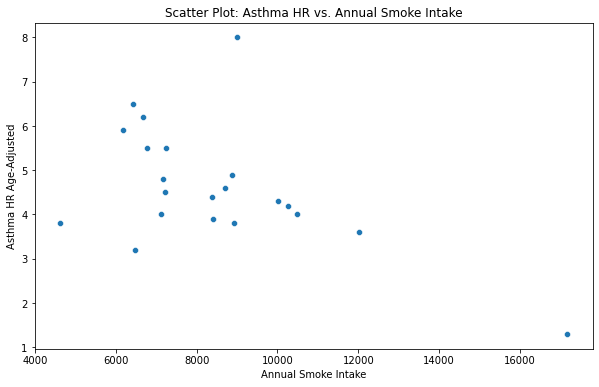

Text(0, 0.5, 'COPD HR Age-Adjusted')

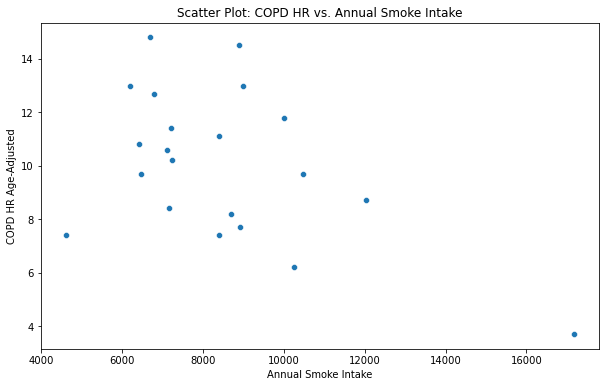

In [19]:
# Scatter plot for Asthma: HR Age-Adjusted (DC)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='annual_smoke_intake', y='Asthma: Age-Adjusted HR (DC)')
plt.title('Scatter Plot: Asthma HR vs. Annual Smoke Intake')
plt.xlabel('Annual Smoke Intake')
plt.ylabel('Asthma HR Age-Adjusted')
plt.show()

# Scatter plot for COPD: HR Age-Adjusted (DC)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Annual Smoke Index', y='COPD: Age-Adjusted HR (DC)')
plt.title('Scatter Plot: COPD HR vs. Annual Smoke Intake')
plt.xlabel('Annual Smoke Intake')
plt.ylabel('COPD HR Age-Adjusted')

## 1. Univariate ARIMA Forecast of Smoke
---

In [ ]:
import pmdarima as pm

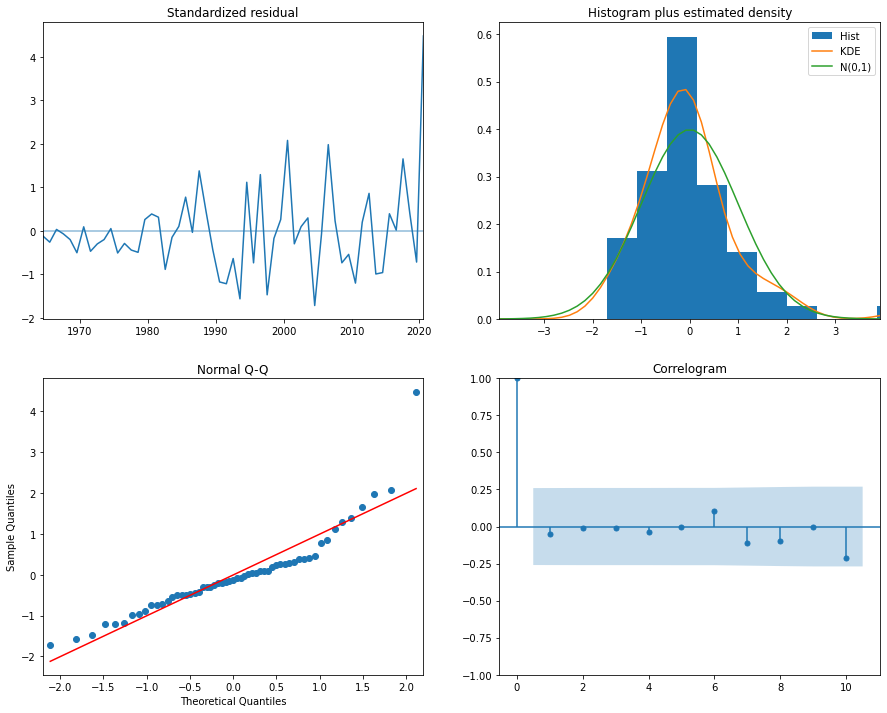

Wall time: 1.76 s


In [32]:
%%time
# Set index to be the middle of each fire season (August 1st)
smoke_estimates.index = pd.to_datetime(smoke_estimates['Fire_Year'], format = "%Y") + pd.DateOffset(months=7)

# Run tuning for ARIMA model
ARIMA_model = pm.auto_arima(smoke_estimates['Annual Smoke Index'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use augmented Dickey- Fuller test to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1, # annual data has frequency of 1
                      d=None,# let model determine 'd'
                      seasonal=False, 
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

# plot diagnostics
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [33]:
def forecast(ARIMA_model, periods=24):
    """""
    Generate a forecast using an ARIMA or SARIMA model and visualize the results.
    This function was developed by Brendan Artley under a MIT License.
    
    Specifically, we'll use yearly periods
    
    Parameters:
        ARIMA_model (ARIMA): A fitted ARIMA or SARIMA model.
        periods (int): Number of periods to forecast into the future.

    Returns:
    None
    """
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
#     index_of_fc = pd.date_range(
#         combined_estimate.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='Y')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted)
    lower_series = pd.Series(confint[:, 0], index=fitted_series.index)
    upper_series = pd.Series(confint[:, 1], index=fitted_series.index)

    # Plot
    fig = plt.figure(figsize=(10,5))
    plt.plot(smoke_estimates["Annual Smoke Index"], color='#1f76b4', label = 'Original Data')
    plt.plot(fitted_series, color='darkgreen', label = "Predicted")
    plt.xlabel("Year")
    plt.ylabel("Average Daily Smoke Intake (Fire Season)")
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15 , label = "95% Confidence Interval")
    plt.legend(loc="upper left")
    return fig, fitted_series

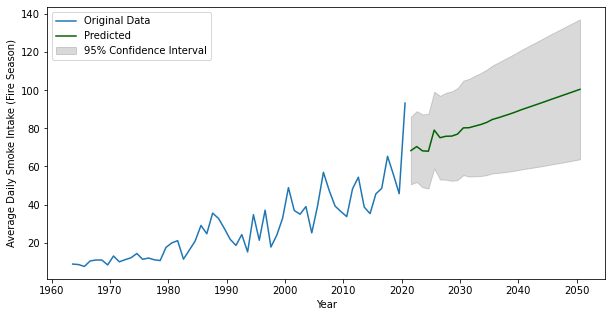

In [34]:
fig,series = forecast(ARIMA_model, periods = 2050-2020)

In [61]:
forecast_fire = pd.DataFrame(series).rename(columns = {0: "Annual Smoke Index"})
forecast_fire['Fire_Year'] = forecast_fire.index.year
forecast_fire = forecast_fire[['Fire_Year', 'Annual Smoke Index']]

all_smoke = pd.concat([smoke_estimates, forecast_fire])
all_smoke.head()

,Fire_Year,Annual Smoke Index
1963-08-01,1963,8.710993
1964-08-01,1964,8.463603
1965-08-01,1965,7.466608
1966-08-01,1966,10.360666
1967-08-01,1967,10.847293


In [63]:
# Gather forecast into one place
merged_df = all_smoke.merge(health_data, left_on='Fire_Year', right_on='Year', how='left').drop(columns=['Year']).rename(columns = {'Fire_Year': "Year"})
merged_df.index = pd.to_datetime(merged_df['Year'], format = "%Y") + pd.DateOffset(months=7)

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import rmse
import itertools
import warnings

In [179]:
endog_col_dict= {
    "Asthma": [
        'Deaths: Asthma (OR)',
        'Incidence: Asthma (OR)',
        'Prevalence: Asthma (OR)',
        'Asthma: Age-Adjusted HR (DC)',
        'Asthma: Crude HR Ages 65+ (DC)', 
    ],
    "COPD": [
        'Deaths: Chronic obstructive pulmonary disease (OR)',
        'Incidence: Chronic obstructive pulmonary disease (OR)',    
        'Prevalence: Chronic obstructive pulmonary disease (OR)',
        'COPD: Age-Adjusted HR (DC)',
        'COPD: Crude HR Ages 65-84 (DC)',
    ],
    "Chronic RIs": [
        'Deaths: Chronic respiratory diseases (OR)', 
        'Incidence: Chronic respiratory diseases (OR)',
        'Prevalence: Chronic respiratory diseases (OR)',
    ]
}

def get_best_VARMAX(endog_cols):
    """Get best P,Q Values."""
    exog_cols = [
        'Year', 
        'Annual Smoke Index',
    ]

    # Get just data for which all columns exist.
    df_selected = merged_df[endog_cols + exog_cols].dropna()
    # Split the data into training and testing sets
    train_size = int(len(df_selected) * 0.8)
    train, test = df_selected.iloc[:train_size], df_selected.iloc[train_size:]

    # Define the range of p and q values for the grid search
    p_values = range(1, 5)  # Adjust the range based on your data
    q_values = range(1, 5)  # Adjust the range based on your data

    # Initialize variables to store optimal values
    best_p, best_q = 0, 0
    best_rmse = float('inf')

    # Perform grid search
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for p, q in itertools.product(p_values, q_values):
            try:
                # Fit VARMAX model
                model = VARMAX(train[endog_cols], exog=train[exog_cols], order=(p, q))
                results = model.fit(disp=False, freq='A')

                # Forecast future values
                forecast_steps = len(test)
                forecast = results.get_forecast(steps=forecast_steps, exog=test[exog_cols])

                # Evaluate the model
                rmse_values = rmse(test[endog_cols], forecast.predicted_mean[endog_cols])
                rmse_value = np.linalg.norm(rmse_values)

                # Update optimal values if current RMSE is better
                if rmse_value < best_rmse:
                    best_p, best_q = p, q
                    best_rmse = rmse_value

            except Exception as e:
                print(f"Error for p={p}, q={q}: {e}")

    print(f"Optimal p: {best_p}, Optimal q: {best_q}, Minimum RMSE: {best_rmse}")

In [111]:
%%time
# Get Best Parameters for Asthma
get_best_VARMAX(endog_col_dict['Asthma'])

Error for p=2, q=1: Schur decomposition solver error.
Error for p=2, q=2: Schur decomposition solver error.
Error for p=2, q=3: Schur decomposition solver error.
Error for p=2, q=4: Schur decomposition solver error.
Error for p=3, q=1: Matrix is not positive definite
Error for p=3, q=2: Matrix is not positive definite
Error for p=3, q=3: Matrix is not positive definite
Error for p=3, q=4: Matrix is not positive definite
Error for p=4, q=1: Matrix is not positive definite
Error for p=4, q=2: Matrix is not positive definite
Error for p=4, q=3: Matrix is not positive definite
Error for p=4, q=4: Matrix is not positive definite
Optimal p: 1, Optimal q: 1, Minimum RMSE: 8.083113936979128
Wall time: 21.5 s


In [180]:
%%time
# Get Best Parameters for COPD
get_best_VARMAX(endog_col_dict['COPD'])

Error for p=2, q=1: Schur decomposition solver error.
Error for p=2, q=2: Schur decomposition solver error.
Error for p=2, q=3: Schur decomposition solver error.
Error for p=2, q=4: Schur decomposition solver error.
Error for p=3, q=1: Matrix is not positive definite
Error for p=3, q=2: Matrix is not positive definite
Error for p=3, q=3: Matrix is not positive definite
Error for p=3, q=4: Matrix is not positive definite
Error for p=4, q=1: Matrix is not positive definite
Error for p=4, q=2: Matrix is not positive definite
Error for p=4, q=3: Matrix is not positive definite
Error for p=4, q=4: Matrix is not positive definite
Optimal p: 1, Optimal q: 4, Minimum RMSE: 21.433162432342556
Wall time: 19.6 s


In [113]:
%%time
# Get Best Parameters for Chronic RIs
get_best_VARMAX(endog_col_dict['Chronic RIs'])

Optimal p: 2, Optimal q: 3, Minimum RMSE: 22.43354691298372
Wall time: 44.8 s


In [130]:
p_q_dict= {
    "Asthma": (1,1),
    "COPD": (1,1),
    "Chronic RIs": (2,3),
}
def get_best_forecast(var_name):
    """
    get best forecast based on variable: "Asthma", "COPD", "Chronic RIs"
    """
    endog_cols = endog_col_dict[var_name]
    # Fit VARMAX model on full data
    full_data = merged_df[merged_df['Year'].isin(range(2000,2020))]
    new_data = merged_df[merged_df['Year'].isin(range(2020,2051))]

    order = p_q_dict[var_name]  # Order of the VAR process (p, q)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = VARMAX(full_data[endog_cols], exog=full_data[exog_cols], order=order)    
        results = model.fit(disp=False)

        # Forecast future values
        forecast_steps = 2050-2019
        forecast = results.get_forecast(steps=forecast_steps, exog=new_data[exog_cols])
    
    # gather means and 95% condfidence intervals
    forecast_df = forecast.predicted_mean.join(forecast.conf_int())
    
    # Ensure that no data is below 0
    forecast_df = np.maximum(forecast_df, 0)
    return forecast_df

In [181]:
%%time
# Get Asthma Data
forecast_df = get_best_forecast('Asthma')
# get COPD Data
forecast_df = forecast_df.join(get_best_forecast('COPD'))
# get chronic RI Data
forecast_df = forecast_df.join(get_best_forecast('Chronic RIs'))

Wall time: 3.9 s


In [182]:
forecast_df

,Deaths: Asthma (OR),Incidence: Asthma (OR),Prevalence: Asthma (OR),Asthma: Age-Adjusted HR (DC),Asthma: Crude HR Ages 65+ (DC),lower Deaths: Asthma (OR),lower Incidence: Asthma (OR),lower Prevalence: Asthma (OR),lower Asthma: Age-Adjusted HR (DC),lower Asthma: Crude HR Ages 65+ (DC),...,upper COPD: Crude HR Ages 65-84 (DC),Deaths: Chronic respiratory diseases (OR),Incidence: Chronic respiratory diseases (OR),Prevalence: Chronic respiratory diseases (OR),lower Deaths: Chronic respiratory diseases (OR),lower Incidence: Chronic respiratory diseases (OR),lower Prevalence: Chronic respiratory diseases (OR),upper Deaths: Chronic respiratory diseases (OR),upper Incidence: Chronic respiratory diseases (OR),upper Prevalence: Chronic respiratory diseases (OR)
2020-08-01,0.172558,117.321922,998.082834,5.391525,0.0,0.162492,114.396086,981.223268,3.852403,0.0,...,51.117667,7.552277,280.184177,1426.585085,7.403602,275.425287,1413.259370,7.700952,284.943067,1439.910800
2021-08-01,0.165321,114.454977,985.065690,2.905752,0.0,0.147818,110.196140,955.216564,0.724168,0.0,...,54.099278,7.651556,291.069610,1457.309899,7.502881,286.310721,1443.984185,7.800231,295.828500,1470.635614
2022-08-01,0.158751,114.100646,986.232566,3.075149,0.0,0.137069,108.931844,948.906896,0.767861,0.0,...,55.734532,7.717849,296.953929,1474.603799,7.569174,292.195040,1461.278085,7.866524,301.712819,1487.929514
2023-08-01,0.151085,114.726303,995.979027,2.507264,0.0,0.126525,108.127177,951.492520,0.096280,0.0,...,55.020423,7.789466,303.645372,1494.065298,7.640791,298.886482,1480.739583,7.938140,308.404262,1507.391013
2024-08-01,0.143812,116.513935,1012.712934,2.405567,0.0,0.117355,108.484526,962.256316,0.000000,0.0,...,53.267114,7.858566,309.955261,1512.502101,7.709891,305.196371,1499.176386,8.007240,314.714150,1525.827816
2025-08-01,0.137756,119.539848,1036.326689,2.371995,0.0,0.110036,110.268370,981.359407,0.000000,0.0,...,50.508455,7.913914,314.180233,1525.339686,7.765240,309.421344,1512.013971,8.062589,318.939123,1538.665401
2026-08-01,0.131920,122.051182,1057.071559,2.142454,0.0,0.103368,111.831370,999.161155,0.000000,0.0,...,48.015241,7.987652,321.193323,1545.664994,7.838978,316.434433,1532.339279,8.136327,325.952212,1558.990709
2027-08-01,0.126812,125.246802,1081.393373,2.050231,0.0,0.097710,114.358507,1021.774646,0.000000,0.0,...,46.720057,8.055607,327.329503,1563.635289,7.906932,322.570614,1550.309574,8.204281,332.088393,1576.961004
2028-08-01,0.122304,128.366422,1104.957995,1.894180,0.0,0.092840,117.036499,1044.446854,0.000000,0.0,...,45.212788,8.124363,333.587236,1581.932022,7.975688,328.828346,1568.606307,8.273037,338.346125,1595.257737
2029-08-01,0.118407,131.412709,1127.746306,1.743368,0.0,0.088700,119.802362,1066.778830,0.000000,0.0,...,43.295162,8.191971,339.670911,1599.761311,8.043296,334.912022,1586.435596,8.340645,344.429801,1613.087025


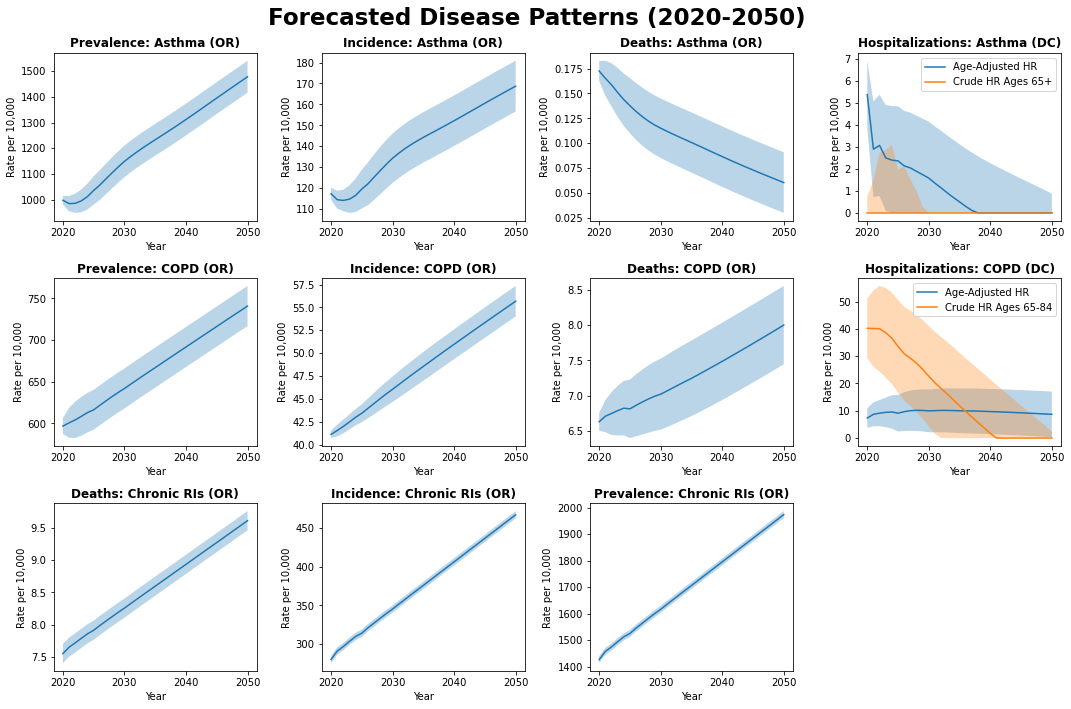

In [191]:
# Select relevant columns
columns_to_plot = ['Prevalence: Asthma (OR)', 
                   'Incidence: Asthma (OR)', 
                   'Deaths: Asthma (OR)',
                   ('Asthma: Age-Adjusted HR (DC)', 'Asthma: Crude HR Ages 65+ (DC)'),
                   'Prevalence: Chronic obstructive pulmonary disease (OR)',
                   'Incidence: Chronic obstructive pulmonary disease (OR)', 
                    'Deaths: Chronic obstructive pulmonary disease (OR)',
                   ('COPD: Age-Adjusted HR (DC)', 'COPD: Crude HR Ages 65-84 (DC)'),
                    'Deaths: Chronic respiratory diseases (OR)',
                   'Incidence: Chronic respiratory diseases (OR)',
                   'Prevalence: Chronic respiratory diseases (OR)',
                    ]

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Plot each variable with its confidence interval
for i, column in enumerate(columns_to_plot):
    if len(column) != 2:
        lower_bound = f'lower {column}'
        upper_bound = f'upper {column}'

        # Plot the variable
        sns.lineplot(data=forecast_df, x=forecast_df.index.year, y=column, ax=axes[i])#, label=variable)

        # Plot the confidence interval
        axes[i].fill_between(forecast_df.index.year, forecast_df[lower_bound], forecast_df[upper_bound], alpha=0.3)

        axes[i].set_title(
            column.replace("Chronic obstructive pulmonary disease", "COPD").replace(
            "respiratory diseases", "RIs"), weight='bold'
        )
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(f'Rate per 10,000')
    if len(column) == 2:
        for col in column:
            variable = col.split(":")[0].strip()  # Extract the variable name
            category = col.split(":")[1].strip().split('(')[0].strip()
            lower_bound = f'lower {col}'
            upper_bound = f'upper {col}'

            # Plot the variable
            sns.lineplot(data=forecast_df, x=forecast_df.index.year, y=col, ax=axes[i], label=category)

            # Plot the confidence interval
            axes[i].fill_between(forecast_df.index.year, forecast_df[lower_bound], forecast_df[upper_bound], alpha=0.3)

            axes[i].set_title(f"Hospitalizations: {variable} (DC)", weight="bold")
            axes[i].set_xlabel('Year')
            axes[i].set_ylabel(f'Rate per 10,000')
fig.delaxes(axes[-1])
# Adjust layout
plt.suptitle("Forecasted Disease Patterns (2020-2050)", fontsize=23,  weight='bold')
plt.tight_layout()

plt.show()

## Consider Correlation Between Variables

In [157]:
import scipy as sp
def get_correlation_vars(var_name, alpha=0.05):
    endog_vars = endog_col_dict[var_name] 
    for var in endog_vars:
        print(f"Checking {var}")
        df = merged_df[['Annual Smoke Index', var]].dropna()
        r1, p1 = sp.stats.pearsonr(df['Annual Smoke Index'], df[var])
        print(f"The R2 value is {r1**2} and Pearson correlation of {r1:0.5f}.")
        print(f"The p-value for the Pearson test is {p1:0.5f}")
        print("**Signficant**" if p1 < alpha else "")
        r, p = sp.stats.spearmanr(df['Annual Smoke Index'], df[var])
        print(f"The R2 value is {r**2} and Spearman rank correlation of {r:0.5f}.")
        print(f"The p-value for the Spearman rank test is {p:0.5f}")
        print("**Signficant**" if p < alpha else "")
        print("------------------------------------------------------------------")

In [158]:
get_correlation_vars("Asthma")

Checking Deaths: Asthma (OR)
The R2 value is 0.5384917137616633 and Pearson correlation of -0.73382.
The p-value for the Pearson test is 0.00000
**Signficant**
The R2 value is 0.47286657650757685 and Spearman rank correlation of -0.68765.
The p-value for the Spearman rank test is 0.00003
**Signficant**
------------------------------------------------------------------
Checking Incidence: Asthma (OR)
The R2 value is 0.02091210869504627 and Pearson correlation of 0.14461.
The p-value for the Pearson test is 0.44580

The R2 value is 0.021104106527955302 and Spearman rank correlation of 0.14527.
The p-value for the Spearman rank test is 0.44370

------------------------------------------------------------------
Checking Prevalence: Asthma (OR)
The R2 value is 0.1083939053045037 and Pearson correlation of 0.32923.
The p-value for the Pearson test is 0.07564

The R2 value is 0.1428655000426874 and Spearman rank correlation of 0.37798.
The p-value for the Spearman rank test is 0.03946
**Signf

In [159]:
get_correlation_vars("COPD")

Checking Deaths: Chronic obstructive pulmonary disease (OR)
The R2 value is 0.5526895228376913 and Pearson correlation of 0.74343.
The p-value for the Pearson test is 0.00000
**Signficant**
The R2 value is 0.5425739884014003 and Spearman rank correlation of 0.73660.
The p-value for the Spearman rank test is 0.00000
**Signficant**
------------------------------------------------------------------
Checking Incidence: Chronic obstructive pulmonary disease (OR)
The R2 value is 0.5179936202151262 and Pearson correlation of 0.71972.
The p-value for the Pearson test is 0.00001
**Signficant**
The R2 value is 0.5412638192726809 and Spearman rank correlation of 0.73571.
The p-value for the Spearman rank test is 0.00000
**Signficant**
------------------------------------------------------------------
Checking Prevalence: Chronic obstructive pulmonary disease (OR)
The R2 value is 0.4424428913526621 and Pearson correlation of 0.66516.
The p-value for the Pearson test is 0.00006
**Signficant**
The R

In [160]:
get_correlation_vars("Chronic RIs")

Checking Deaths: Chronic respiratory diseases (OR)
The R2 value is 0.5544496575801275 and Pearson correlation of 0.74461.
The p-value for the Pearson test is 0.00000
**Signficant**
The R2 value is 0.5425739884014003 and Spearman rank correlation of 0.73660.
The p-value for the Spearman rank test is 0.00000
**Signficant**
------------------------------------------------------------------
Checking Incidence: Chronic respiratory diseases (OR)
The R2 value is 0.26372986042747487 and Pearson correlation of 0.51355.
The p-value for the Pearson test is 0.00370
**Signficant**
The R2 value is 0.25122507890982565 and Spearman rank correlation of 0.50122.
The p-value for the Spearman rank test is 0.00478
**Signficant**
------------------------------------------------------------------
Checking Prevalence: Chronic respiratory diseases (OR)
The R2 value is 0.20161596260025214 and Pearson correlation of 0.44902.
The p-value for the Pearson test is 0.01281
**Signficant**
The R2 value is 0.23845677003